<a href="https://colab.research.google.com/github/aruaru0/tabnet-test/blob/main/tabnet_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# インストール

In [1]:
!pip install pytorch-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.6 MB/s eta 0:00:00


# ライブラリのインポート

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from pytorch_tabnet.tab_model import TabNetRegressor
from pytorch_tabnet.pretraining import TabNetPretrainer

import torch

## データの作成

In [3]:
X, Y, coef = make_regression(
                       random_state=42,
                       n_samples=10000,
                       n_features=10,
                       n_informative=5,
                       noise=1,
                       bias=1.0,
                       coef=True)

In [4]:
for i, c in enumerate(coef):
  print(f"feature {i} : {c}")

feature 0 : 0.0
feature 1 : 19.365117777553486
feature 2 : 0.0
feature 3 : 68.28011328758366
feature 4 : 0.0
feature 5 : 8.88918861576965
feature 6 : 0.0
feature 7 : 29.506960083972224
feature 8 : 0.0
feature 9 : 78.46795175040386


In [5]:
df = pd.DataFrame(X)
df['target'] = Y
df.head(20)

,0,1,2,3,4,5,6,7,8,9,target
0,0.078577,0.428317,0.458168,-0.340908,-0.165631,-0.593811,-2.128734,-0.519396,-0.979721,0.077156,-31.086145
1,0.736466,-1.942549,1.346121,2.742017,-1.627080,0.803719,1.226826,-1.263887,0.066717,-1.191329,26.932057
2,-0.559654,-1.052523,0.492715,-1.158793,0.068824,-1.083666,-0.180136,0.143631,-0.304065,-2.086849,-267.826781
3,0.899042,-0.463797,0.482040,1.797545,0.843989,-0.969279,2.397024,0.786121,0.724094,0.405030,160.509231
4,0.461063,1.213479,1.385060,-0.200637,-0.025790,0.120968,0.631484,0.425034,1.211433,-0.132404,14.531686
5,0.733670,1.371056,2.400779,0.803245,0.742062,-0.191084,-1.117174,0.622949,-0.613527,0.618200,147.916110
6,0.734280,0.892507,0.235979,1.404952,-0.735630,0.750165,1.230795,0.061171,1.004032,0.085190,128.595873
7,0.282646,-1.794897,0.546343,-1.307643,0.128129,0.342529,0.978516,0.180550,0.386655,0.826468,-50.249197
8,1.534001,0.046938,-0.055847,-0.640659,1.409895,0.031321,1.524871,-0.441486,-0.478218,0.893628,14.779530
9,0.358256,-0.360202,0.100455,-0.424502,-0.174934,-0.107015,-0.424285,1.332879,-1.611653,-0.329696,-21.946090


In [6]:
train_rate, val_rate, test_rate = 0.7, 0.15, 0.15

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=train_rate, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=test_rate/(test_rate+val_rate), random_state=42)

In [7]:
y_train = y_train.reshape(-1, 1)
y_valid = y_valid.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [8]:
len(X_train), len(X_valid), len(X_test)

(7000, 1500, 1500)

In [9]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((7000, 10), (7000, 1), (1500, 10), (1500, 1))

# TabNetを使って予測

## 事前学習

In [10]:
unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax'
)

unsupervised_model.fit(
    X_train=X_train,
    eval_set=[X_valid],
    pretraining_ratio=0.8,
    max_epochs = 100,
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.38042 | val_0_unsup_loss_numpy: 1.1094199419021606|  0:00:00s
epoch 1  | loss: 1.45138 | val_0_unsup_loss_numpy: 1.0236999988555908|  0:00:01s
epoch 2  | loss: 1.1361  | val_0_unsup_loss_numpy: 1.0139100551605225|  0:00:01s
epoch 3  | loss: 1.05849 | val_0_unsup_loss_numpy: 1.0106899738311768|  0:00:02s
epoch 4  | loss: 1.027   | val_0_unsup_loss_numpy: 1.0062600374221802|  0:00:03s
epoch 5  | loss: 1.02112 | val_0_unsup_loss_numpy: 1.0042500495910645|  0:00:04s
epoch 6  | loss: 1.01256 | val_0_unsup_loss_numpy: 1.001829981803894|  0:00:05s
epoch 7  | loss: 1.00612 | val_0_unsup_loss_numpy: 1.0001499652862549|  0:00:06s
epoch 8  | loss: 0.99998 | val_0_unsup_loss_numpy: 0.9978100061416626|  0:00:07s
epoch 9  | loss: 1.00453 | val_0_unsup_loss_numpy: 0.9981099963188171|  0:00:08s
epoch 10 | loss: 1.00368 | val_0_unsup_loss_numpy: 0.9984700083732605|  0:00:08s
epoch 11 | loss: 1.00775 | val_0_unsup_loss_numpy: 0.9974200129508972|  0:00:09s
epoch 12 | loss: 1.00019 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


## 学習

In [11]:
tabnet_params = {
                 "optimizer_fn":torch.optim.Adam,
                 "optimizer_params":dict(lr=2e-2),
                 "scheduler_fn":torch.optim.lr_scheduler.ReduceLROnPlateau, #torch.optim.lr_scheduler.StepLR,
                 "mask_type":'entmax',
                 }

model = TabNetRegressor(**tabnet_params
                      )

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [12]:
max_epochs = 100

In [13]:
# from pytorch_tabnet.augmentations import ClassificationSMOTE
# aug = ClassificationSMOTE(p=0.2)

In [14]:
model.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['rmse'],
    max_epochs=max_epochs , patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    augmentations=None,
    from_unsupervised=unsupervised_model
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 12118.31671| train_rmse: 108.0536| valid_rmse: 107.13462|  0:00:01s
epoch 1  | loss: 11397.49081| train_rmse: 100.827 | valid_rmse: 99.34794|  0:00:02s
epoch 2  | loss: 10353.5606| train_rmse: 91.17215| valid_rmse: 88.90089|  0:00:04s
epoch 3  | loss: 9017.42726| train_rmse: 82.59382| valid_rmse: 79.76903|  0:00:06s
epoch 4  | loss: 7485.24704| train_rmse: 73.57201| valid_rmse: 70.02692|  0:00:06s
epoch 5  | loss: 5967.73323| train_rmse: 64.5824 | valid_rmse: 61.69118|  0:00:07s
epoch 6  | loss: 4564.27776| train_rmse: 55.92208| valid_rmse: 53.01321|  0:00:08s
epoch 7  | loss: 3308.92521| train_rmse: 47.58256| valid_rmse: 46.507  |  0:00:08s
epoch 8  | loss: 2348.92445| train_rmse: 36.84457| valid_rmse: 36.58099|  0:00:09s
epoch 9  | loss: 1514.68068| train_rmse: 22.25636| valid_rmse: 22.66531|  0:00:09s
epoch 10 | loss: 888.13512| train_rmse: 14.26035| valid_rmse: 14.9498 |  0:00:10s
epoch 11 | loss: 443.38793| train_rmse: 11.07138| valid_rmse: 11.37399|  0:00:10s
epo

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


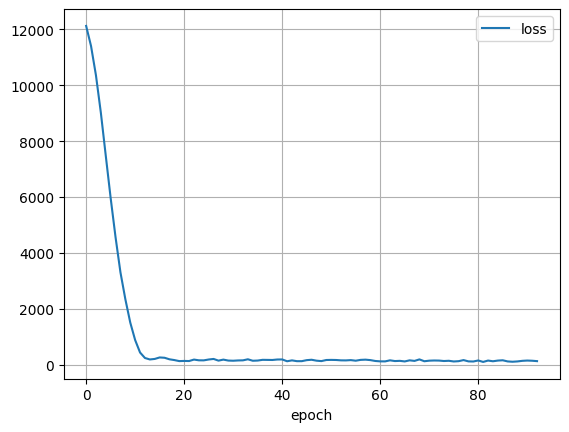

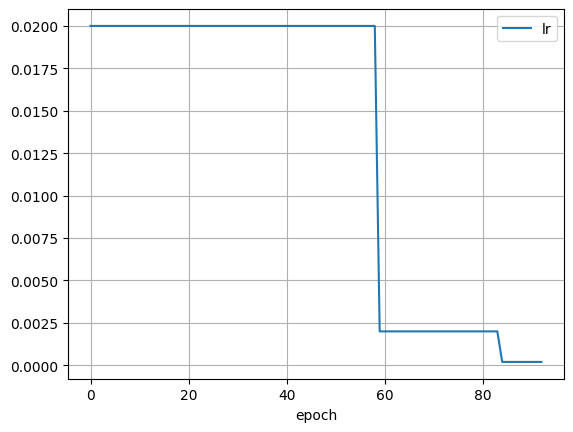

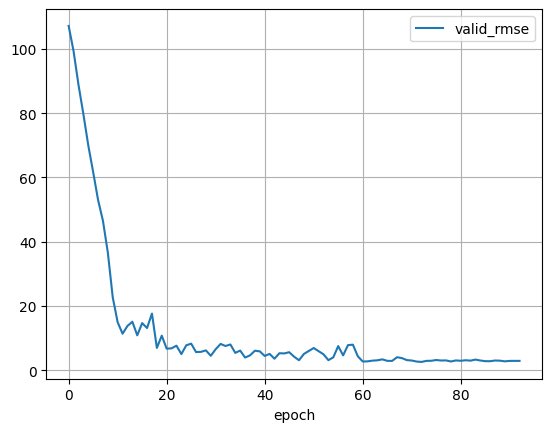

In [15]:
import matplotlib.pyplot as plt

for param in ['loss', 'lr', 'valid_rmse']:
    plt.plot(model.history[param], label=param)
    plt.xlabel('epoch')
    plt.grid()
    plt.legend()
    plt.show()

## 予測

In [16]:
preds = model.predict(X_test)
test_mse = mean_squared_error(preds, y_test)


preds_valid = model.predict(X_valid)
valid_mse = mean_squared_error(preds_valid, y_valid)

print("valid_mse = ", valid_mse)
print("test_mse = ", test_mse)

valid_mse =  6.746282744729993
test_mse =  5.320123732256637


feature 9 : 0.27575028967520165
feature 7 : 0.22997472336163366
feature 3 : 0.18500877190112627
feature 1 : 0.08352469983538302
feature 6 : 0.07164931330419394
feature 0 : 0.06011197364371322
feature 8 : 0.037104410271083
feature 4 : 0.03442517191734589
feature 5 : 0.014042432553776525
feature 2 : 0.008408213536542784


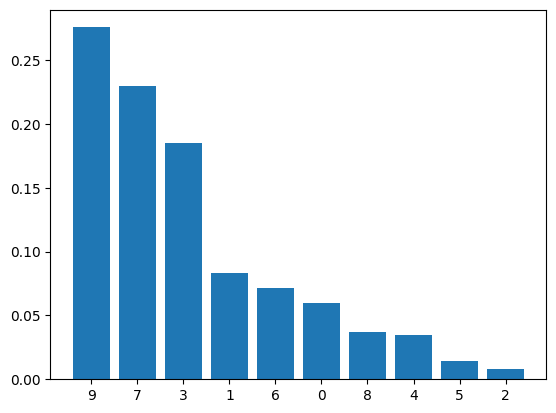

In [17]:
importance = sorted([(i, n) for i, n in enumerate(model.feature_importances_)], key = lambda x: x[1], reverse = True)
label, y = [], []
for e in importance:
  print(f"feature {e[0]} : {e[1]}")
  label.append(e[0])
  y.append(e[1])

plt.bar([i for i in range(len(y))], y, tick_label = label)
plt.show()

## LightGBMを使って予測

## 学習

In [18]:
from lightgbm import LGBMRegressor

lgb_params = {
  'n_estimators': 10000,
  'learning_rate': 0.01,
  'random_state': 42,
  'early_stopping_round': 100,
  'metric': 'rmse'
}

lgb = LGBMRegressor(**lgb_params)
lgb.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 10
[LightGBM] [Info] Start training from score -0.824490
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[7470]	valid_0's rmse: 6.97991


LGBMRegressor(early_stopping_round=100, learning_rate=0.01, metric='rmse',
              n_estimators=10000, random_state=42)

## 予測

In [19]:
preds = lgb.predict(X_test)
test_mse = mean_squared_error(preds, y_test)


preds_valid = lgb.predict(X_valid)
valid_mse = mean_squared_error(preds_valid, y_valid)

print("valid_auc = ", valid_mse)
print("test_auc = ", test_mse)

valid_auc =  48.71907754640076
test_auc =  48.513214953676204


feature 3 : 40635
feature 9 : 37997
feature 7 : 25617
feature 1 : 21028
feature 5 : 18205
feature 6 : 16682
feature 8 : 16479
feature 0 : 16031
feature 4 : 15829
feature 2 : 15597


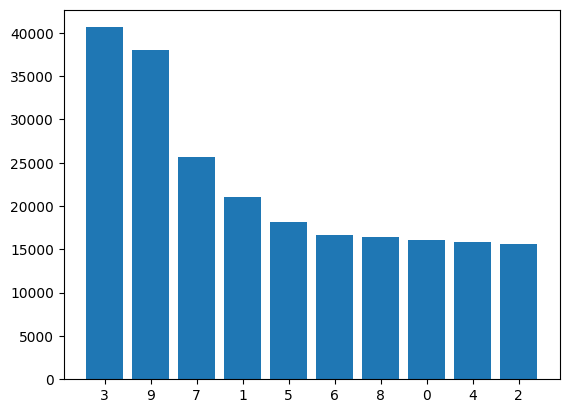

In [20]:
importance = sorted([(i, n) for i, n in enumerate(lgb.feature_importances_)], key = lambda x: x[1], reverse = True)
label, y = [], []
for e in importance:
  print(f"feature {e[0]} : {e[1]}")
  label.append(e[0])
  y.append(e[1])

plt.bar([i for i in range(len(y))], y, tick_label = label)
plt.show()